## Fashion MNIST Dataset 신경망 훈련

### import

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [34]:
np.random.seed(42)
tf.random.set_seed(42)

In [35]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [36]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

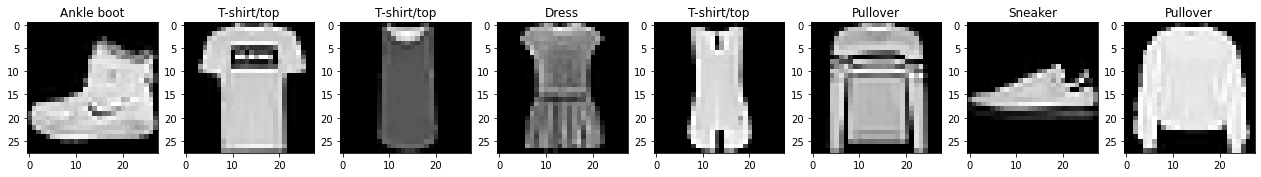

In [37]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

figure, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=8)
for i in range(8):
    axes[i].imshow(train_images[i], cmap="gray")
    axes[i].set_title(class_names[train_labels[i]])

In [38]:
train_images = np.array(train_images/255.0, dtype=np.float32)
train_labels = np.array(train_labels, dtype=np.float32)
test_images = np.array(test_images/255.0, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.float32)

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

### 모델 생성

* Sequential API<br>
- 입력층이 따로 필요없음<br>
- 직관적이고 편리하지만 복잡한 모델 구현하는데 한계가 있음<br>

In [ ]:
from tensorflow.keras.models import Sequential

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(50, activation='sigmoid'),
    Dense(10, activation='softmax')    
])

model.summary()

* 함수형 API(Functional API)<br>
- 입력층이 따로 정의<br>
- 이전층이 다음층의 입력으로 사용됨<br>
- 각 층을 일종의 함수로 정의<br>
- 확장성이 좋음(다중 입출력 등 복잡한 모델 구현 가능)<br>

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense

In [39]:
input_tensor = Input(shape=(28, 28))
x = Flatten()(input_tensor) # 객체 만들고 함수 호출하는 방식
x = Dense(50, activation='sigmoid')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_tensor, outputs=output)

### 모델 컴파일(optimizer, loss등 설정)

In [12]:
from tensorflow.keras.optimizers import SGD

In [40]:
model.compile(optimizer=SGD(0.1), loss='categorical_crossentropy', metrics=['accuracy'])

### 모델 학습

* Callback - ModelCheckpoint

In [62]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [49]:
checkpoint_cb = ModelCheckpoint("my_keras_model.h5", save_best_only=True, verbose=1)
# checkpoint_cb = ModelCheckpoint("weights.{epoch:02d}-{val_loss:.2f}.h5", save_best_only=True, verbose=1)

In [50]:
history = model.fit(train_images, train_oh_labels, validation_split=0.2, batch_size=128, epochs=20, verbose=1, callbacks=[checkpoint_cb])

Epoch 1/20
371/375 [============================>.] - ETA: 0s - loss: 0.2970 - accuracy: 0.8946
Epoch 00001: val_loss improved from inf to 0.34598, saving model to my_keras_model.h5
375/375 [==============================] - 1s 3ms/step - loss: 0.2974 - accuracy: 0.8943 - val_loss: 0.3460 - val_accuracy: 0.8780
Epoch 2/20
374/375 [============================>.] - ETA: 0s - loss: 0.2961 - accuracy: 0.8956
Epoch 00002: val_loss improved from 0.34598 to 0.34355, saving model to my_keras_model.h5
375/375 [==============================] - 1s 2ms/step - loss: 0.2963 - accuracy: 0.8956 - val_loss: 0.3436 - val_accuracy: 0.8767
Epoch 3/20
373/375 [============================>.] - ETA: 0s - loss: 0.2949 - accuracy: 0.8951
Epoch 00003: val_loss improved from 0.34355 to 0.34073, saving model to my_keras_model.h5
375/375 [==============================] - 1s 3ms/step - loss: 0.2947 - accuracy: 0.8952 - val_loss: 0.3407 - val_accuracy: 0.8782
Epoch 4/20
366/375 [============================>.] -

In [51]:
model.evaluate(test_images, test_oh_labels, batch_size=128)

79/79 [==============================] - 0s 2ms/step - loss: 0.3620 - accuracy: 0.8699


[0.36198118329048157, 0.8698999881744385]

In [21]:
from tensorflow.keras.models import load_model

In [52]:
model2 = load_model("my_keras_model.h5")

In [53]:
model2.evaluate(test_images, test_oh_labels, batch_size=128)

79/79 [==============================] - 0s 2ms/step - loss: 0.3582 - accuracy: 0.8727


[0.3582404553890228, 0.8726999759674072]

* Callback - EarlyStopping

In [70]:
early_stopping_cb = EarlyStopping(patience=20, restore_best_weights=True)

In [60]:
history = model.fit(train_images, train_oh_labels, validation_split=0.2, batch_size=128, epochs=50, verbose=1, callbacks=[early_stopping_cb])

Epoch 1/50
375/375 [==============================] - 1s 3ms/step - loss: 0.2336 - accuracy: 0.9164 - val_loss: 0.3300 - val_accuracy: 0.8822
Epoch 2/50
375/375 [==============================] - 1s 2ms/step - loss: 0.2329 - accuracy: 0.9175 - val_loss: 0.3281 - val_accuracy: 0.8816
Epoch 3/50
375/375 [==============================] - 1s 2ms/step - loss: 0.2321 - accuracy: 0.9168 - val_loss: 0.3242 - val_accuracy: 0.8837
Epoch 4/50
375/375 [==============================] - 1s 2ms/step - loss: 0.2320 - accuracy: 0.9181 - val_loss: 0.3251 - val_accuracy: 0.8845
Epoch 5/50
375/375 [==============================] - 1s 2ms/step - loss: 0.2311 - accuracy: 0.9181 - val_loss: 0.3333 - val_accuracy: 0.8846
Epoch 6/50
375/375 [==============================] - 1s 2ms/step - loss: 0.2308 - accuracy: 0.9182 - val_loss: 0.3242 - val_accuracy: 0.8853
Epoch 7/50
375/375 [==============================] - 1s 2ms/step - loss: 0.2305 - accuracy: 0.9177 - val_loss: 0.3249 - val_accuracy: 0.8852
Epoch 

In [61]:
model.evaluate(test_images, test_oh_labels, batch_size=128)

79/79 [==============================] - 0s 2ms/step - loss: 0.3488 - accuracy: 0.8746


[0.348783403635025, 0.8745999932289124]

* Callback - ReduceLROnPlateau

In [63]:
reducelr_cb = ReduceLROnPlateau(verbose=1)

In [64]:
history = model.fit(train_images, train_oh_labels, validation_split=0.2, batch_size=128, epochs=50, verbose=1, callbacks=[reducelr_cb])

Epoch 1/50
375/375 [==============================] - 1s 3ms/step - loss: 0.2316 - accuracy: 0.9172 - val_loss: 0.3300 - val_accuracy: 0.8817
Epoch 2/50
375/375 [==============================] - 1s 2ms/step - loss: 0.2309 - accuracy: 0.9180 - val_loss: 0.3281 - val_accuracy: 0.8819
Epoch 3/50
375/375 [==============================] - 1s 2ms/step - loss: 0.2302 - accuracy: 0.9174 - val_loss: 0.3241 - val_accuracy: 0.8832
Epoch 4/50
375/375 [==============================] - 1s 2ms/step - loss: 0.2302 - accuracy: 0.9187 - val_loss: 0.3251 - val_accuracy: 0.8845
Epoch 5/50
375/375 [==============================] - 1s 2ms/step - loss: 0.2292 - accuracy: 0.9189 - val_loss: 0.3333 - val_accuracy: 0.8849
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 0.2290 - accuracy: 0.9192 - val_loss: 0.3242 - val_accuracy: 0.8856
Epoch 7/50
375/375 [==============================] - 1s 2ms/step - loss: 0.2287 - accuracy: 0.9184 - val_loss: 0.3249 - val_accuracy: 0.8849
Epoch 

In [65]:
model.evaluate(test_images, test_oh_labels, batch_size=128)

79/79 [==============================] - 0s 2ms/step - loss: 0.3474 - accuracy: 0.8765


[0.34735679626464844, 0.8765000104904175]

* Callback 조합

In [72]:
history = model.fit(train_images, train_oh_labels, validation_split=0.2, batch_size=128, epochs=50, verbose=1, callbacks=[checkpoint_cb, reducelr_cb, early_stopping_cb])

Epoch 1/50
368/375 [============================>.] - ETA: 0s - loss: 0.2149 - accuracy: 0.9248
Epoch 00001: val_loss improved from 0.33341 to 0.32232, saving model to my_keras_model.h5
375/375 [==============================] - 1s 2ms/step - loss: 0.2157 - accuracy: 0.9244 - val_loss: 0.3223 - val_accuracy: 0.8856
Epoch 2/50
375/375 [==============================] - ETA: 0s - loss: 0.2157 - accuracy: 0.9244
Epoch 00002: val_loss did not improve from 0.32232
375/375 [==============================] - 1s 2ms/step - loss: 0.2157 - accuracy: 0.9244 - val_loss: 0.3223 - val_accuracy: 0.8856
Epoch 3/50
351/375 [===========================>..] - ETA: 0s - loss: 0.2155 - accuracy: 0.9241
Epoch 00003: val_loss did not improve from 0.32232
375/375 [==============================] - 1s 2ms/step - loss: 0.2157 - accuracy: 0.9244 - val_loss: 0.3223 - val_accuracy: 0.8856
Epoch 4/50
367/375 [============================>.] - ETA: 0s - loss: 0.2146 - accuracy: 0.9247
Epoch 00004: val_loss did not i

In [73]:
model.evaluate(test_images, test_oh_labels, batch_size=128)

79/79 [==============================] - 0s 2ms/step - loss: 0.3474 - accuracy: 0.8766


[0.34735655784606934, 0.8766000270843506]

### 하이퍼 파라미터 튜닝

In [79]:
def build_model(n_neurons=50):
    input_tensor = Input(shape=(28, 28))
    x = Flatten()(input_tensor) 
    x = Dense(n_neurons, activation='sigmoid')(x)
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=output)
    model.compile(optimizer=SGD(0.1), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [80]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier  

In [81]:
keras_clf = KerasClassifier(build_model)

In [82]:
param_grid = {
    "n_neurons" : [50, 100]
}

grid_search = GridSearchCV(keras_clf, param_grid, cv=3)
grid_search.fit(train_images, train_oh_labels, validation_split=0.2, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
250/250 [==============================] - 1s 3ms/step - loss: 1.2658 - accuracy: 0.6570 - val_loss: 0.8557 - val_accuracy: 0.7427
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.7579 - accuracy: 0.7613 - val_loss: 0.6814 - val_accuracy: 0.7739
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.6416 - accuracy: 0.7883 - val_loss: 0.6076 - val_accuracy: 0.7944
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5814 - accuracy: 0.8042 - val_loss: 0.5696 - val_accuracy: 0.8043
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.5427 - accuracy: 0.8172 - val_loss: 0.5350 - val_accuracy: 0.8119
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.5160 - accuracy: 0.8239 - val_loss: 0.5150 - val_accuracy: 0.8220
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4961 - accuracy: 0.8294 - val_loss: 0.4970 - val_accuracy: 0.8232
Epoch 

250/250 [==============================] - 1s 3ms/step - loss: 0.5307 - accuracy: 0.8163 - val_loss: 0.5232 - val_accuracy: 0.8217
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.5078 - accuracy: 0.8238 - val_loss: 0.5097 - val_accuracy: 0.8256
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4898 - accuracy: 0.8287 - val_loss: 0.4900 - val_accuracy: 0.8361
Epoch 8/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4760 - accuracy: 0.8339 - val_loss: 0.4826 - val_accuracy: 0.8359
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4658 - accuracy: 0.8357 - val_loss: 0.4718 - val_accuracy: 0.8420
Epoch 10/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4606 - accuracy: 0.8367
Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 1.1185 - accuracy: 0.6924 - val_loss: 0.7431 - val_accuracy: 0.7614
Epoch 2/10
375/375 [==============================] - 1s 3

GridSearchCV(cv=3,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x0000018F14B40760>,
             param_grid={'n_neurons': [50, 100]})

In [84]:
grid_search.best_score_

0.8366499940554301

In [85]:
grid_search.best_params_

{'n_neurons': 50}